TSAF EXP 01

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("ETH10M.csv")
print(df)

                   dateTime     open     high      low    close     volume
0       2019-11-27 11:55:00   145.84   146.59   145.73   146.58    676.140
1       2019-11-27 12:05:00   147.58   149.34   146.40   148.49    641.980
2       2019-11-27 12:15:00   148.26   148.54   146.94   147.47    652.360
3       2019-11-27 12:25:00   148.04   148.59   147.47   148.22    749.910
4       2019-11-27 12:35:00   147.74   147.79   147.26   147.58    642.400
...                     ...      ...      ...      ...      ...        ...
120889  2022-03-16 00:05:00  2621.05  2629.00  2614.00  2625.68  12395.445
120890  2022-03-16 00:15:00  2622.34  2622.53  2616.21  2617.59   3416.198
120891  2022-03-16 00:25:00  2606.95  2617.91  2606.56  2616.35   7495.997
120892  2022-03-16 00:35:00  2620.09  2620.22  2612.56  2613.88   4737.861
120893  2022-03-16 00:45:00  2613.79  2615.76  2609.23  2613.00   4151.133

[120894 rows x 6 columns]


In [3]:
df = pd.read_csv("ETH15M.csv", parse_dates=["dateTime"], index_col="dateTime")

In [4]:
df.head()

,open,high,low,close,volume
dateTime,,,,,
2019-11-27 14:15:00,148.00,148.08,146.80,147.38,2693.24
2019-11-27 14:30:00,147.37,147.66,147.15,147.28,2355.46
2019-11-27 14:45:00,147.48,147.66,146.90,147.65,2584.54
2019-11-27 15:00:00,147.61,147.98,147.32,147.95,1876.29
2019-11-27 15:15:00,147.97,148.71,147.79,148.69,2407.68


In [5]:
df.tail()

,open,high,low,close,volume
dateTime,,,,,
2022-03-15 23:45:00,2624.76,2627.84,2615.49,2617.29,7743.638
2022-03-16 00:00:00,2617.29,2629.00,2614.00,2622.35,18667.741
2022-03-16 00:15:00,2622.34,2622.53,2602.06,2616.35,23557.250
2022-03-16 00:30:00,2616.36,2621.26,2612.56,2613.79,11413.161
2022-03-16 00:45:00,2613.79,2615.77,2609.23,2610.80,9660.115


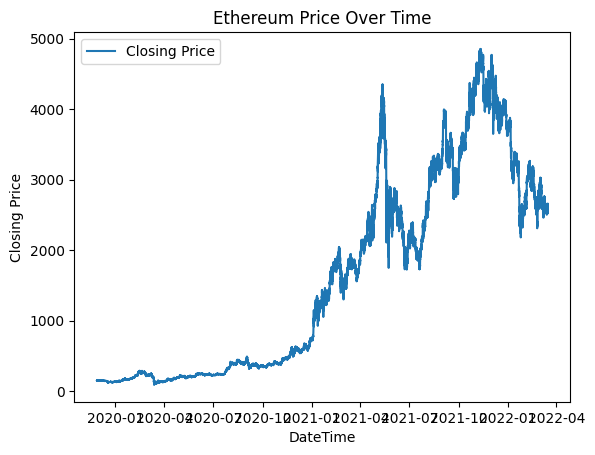

In [8]:
plt.xlabel("DateTime")
plt.ylabel("Closing Price")
plt.title("Ethereum Price Over Time")
plt.plot(df.index, df["close"], label="Closing Price")
plt.legend()
plt.show()

TSAF EXP 01 B

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [10]:
file_path = 'ETH15M.csv'
data = pd.read_csv(file_path, parse_dates=['dateTime'], index_col='dateTime')

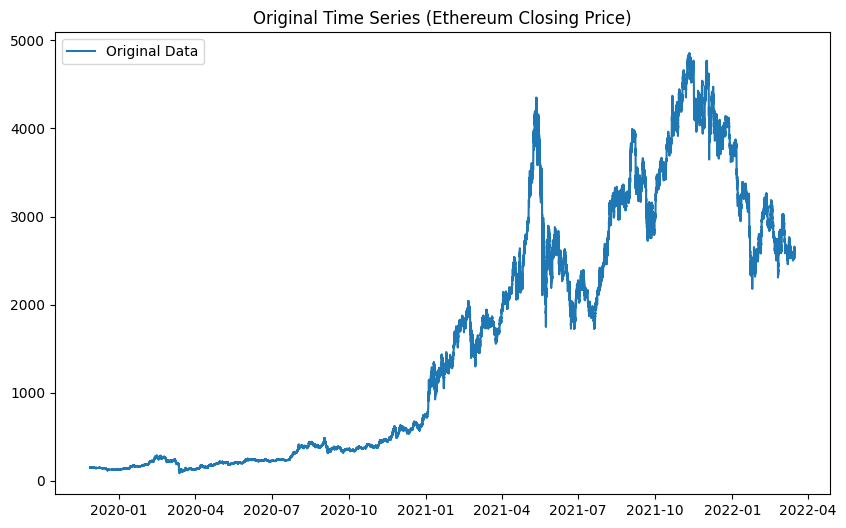

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(data['close'], label='Original Data')
plt.title('Original Time Series (Ethereum Closing Price)')
plt.legend()
plt.show()

In [13]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')


In [14]:
# ADF test on original data
print("Original Data ADF Test:")
adf_test(data['close'])

Original Data ADF Test:
ADF Statistic: -1.200761691014914
p-value: 0.6732679658885397
Critical Values:
   1%: -3.4304312139350364
   5%: -2.8615758951912285
   10%: -2.566789105770906


In [15]:
data_diff = data['close'].diff().dropna()

In [16]:
print("\nDifferenced Data ADF Test:")
adf_test(data_diff)


Differenced Data ADF Test:
ADF Statistic: -34.18611994352339
p-value: 0.0
Critical Values:
   1%: -3.4304312149436744
   5%: -2.8615758956370234
   10%: -2.566789106008188


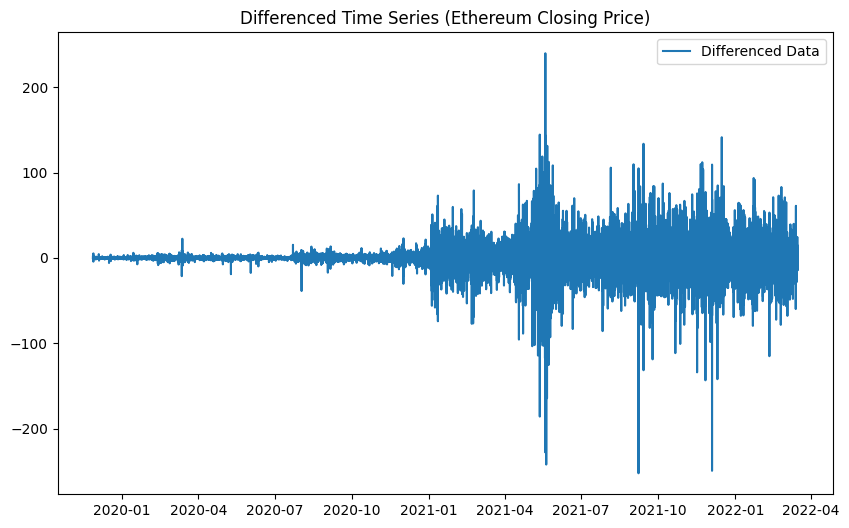

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Data')
plt.title('Differenced Time Series (Ethereum Closing Price)')
plt.legend()
plt.show()

In [18]:
data_log = np.log(data['close'])

In [19]:
print("\nLog-Transformed Data ADF Test:")
adf_test(data_log)


Log-Transformed Data ADF Test:
ADF Statistic: -1.1120148452237362
p-value: 0.710256817628054
Critical Values:
   1%: -3.4304312139350364
   5%: -2.8615758951912285
   10%: -2.566789105770906


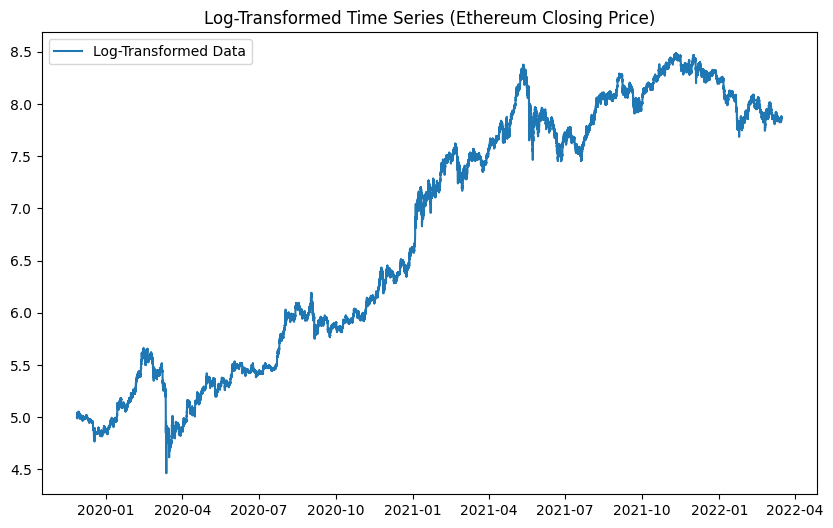

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(data_log, label='Log-Transformed Data')
plt.title('Log-Transformed Time Series (Ethereum Closing Price)')
plt.legend()
plt.show()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

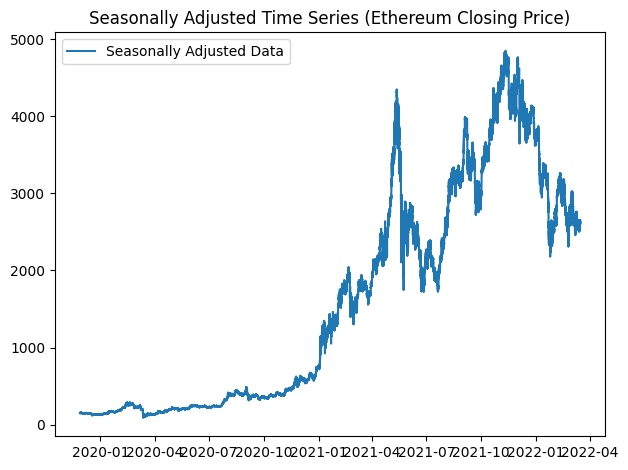

In [25]:
result = seasonal_decompose(data['close'], model='additive', period=12)  # assuming 12-step seasonality
seasonally_adjusted = data['close'] - result.seasonal

plt.plot(seasonally_adjusted, label='Seasonally Adjusted Data')
plt.title('Seasonally Adjusted Time Series (Ethereum Closing Price)')
plt.legend()
plt.tight_layout()
plt.show()